In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn import preprocessing

In [5]:
titanic_df = pd.read_csv('train.csv')

In [6]:
titanic_df.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
type(titanic_df)

pandas.core.frame.DataFrame

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)

In [10]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
# to analyse the freq of survivors

In [12]:
survived_freq = titanic_df.Survived.value_counts()

In [13]:
print(survived_freq)

0    549
1    342
Name: Survived, dtype: int64


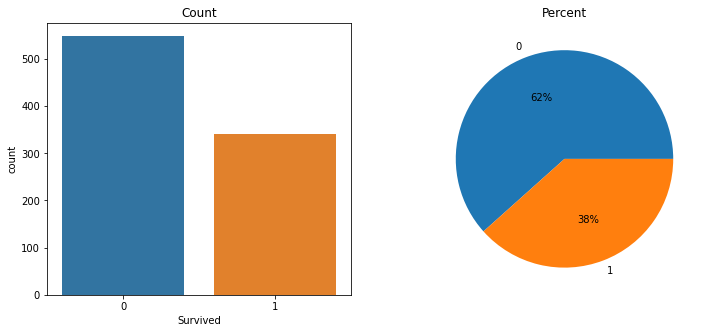

In [14]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count')
plt.subplot(122)
plt.pie(survived_freq,labels=survived_freq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

In [15]:
titanic_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [16]:
# to analyse the pclass distribution

In [17]:
pclass_freq = titanic_df.Pclass.value_counts()

In [18]:
print(pclass_freq)

3    491
1    216
2    184
Name: Pclass, dtype: int64


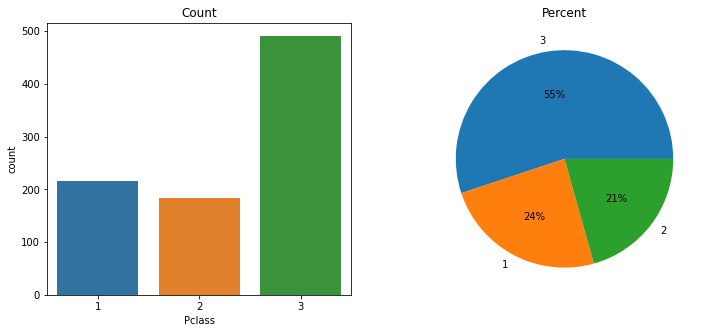

In [19]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Count')
plt.subplot(122)
plt.pie(pclass_freq,labels=pclass_freq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

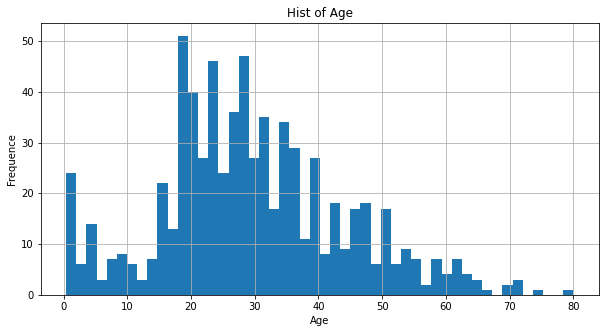

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(111)
titanic_df['Age'].hist(bins = 50)
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.title('Hist of Age')
plt.show()

In [21]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# or if I want to self define the quantile

In [23]:
titanic_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,1.0,3.0,50.0,1.0,2.0,77.9583
1.0,1.0,3.0,80.0,8.0,6.0,512.3292


In [24]:
# to find the relation between two or more variables using sctter plot

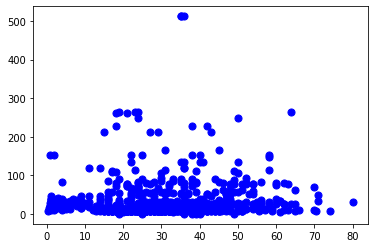

In [25]:
plt.scatter(titanic_df.Age, titanic_df.Fare, 50, 'blue')

In [26]:
# using crosstab to analyse the relationship

In [27]:
pd.crosstab(titanic_df.Survived,titanic_df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [28]:
# to convert it to the ration of each part

In [29]:
pd.crosstab(titanic_df.Survived,titanic_df.Pclass).apply(lambda a:a/a.sum(),axis=0)

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [30]:
# to deal with na value in the data set

In [31]:
# delete the whole row if there is a na value in the row

In [32]:
dropna = titanic_df.dropna()

In [33]:
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Cabin     183 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [34]:
# to drop the whole row if there is a na value in the designated col

In [35]:
Age_dropna = titanic_df[['Age']].dropna()

In [36]:
Age_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [37]:
# mark na values with new variable (_isna)

In [38]:
titanic_df['Age_isna'] = 0

In [39]:
titanic_df.loc[titanic_df['Age'].isnull(), 'Age_isna'] = 1

In [40]:
titanic_df['Age_isna'].value_counts()

0    714
1    177
Name: Age_isna, dtype: int64

In [41]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [42]:
# fill na values with the mean value, hence no influence on the overall mean

In [43]:
age_mean = round(titanic_df['Age'].mean())

In [44]:
age_mean

30

In [45]:
titanic_df['Age'].fillna(age_mean, inplace = True)

In [46]:
titanic_df['Age'].describe() # or titanic_df.Age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [47]:
# encoding the pclass by one-hot 

In [48]:
pclass_onehot = pd.get_dummies(titanic_df.Pclass, prefix='Pclass')

In [49]:
pclass_onehot.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [50]:
# put the age into several categories

In [51]:
cut_points = [0, 18, 25, 40, 60, 100] # a list of age breaks

In [52]:
titanic_df["Age_bin"] = pd.cut(titanic_df.Age, bins=cut_points)

In [53]:
# automatically by descending order

In [54]:
titanic_df["Age_bin"].value_counts()

(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: Age_bin, dtype: int64

In [55]:
titanic_df['Age_wbin'] = pd.cut(titanic_df.Age, 10)

In [56]:
titanic_df['Age_wbin'].value_counts()

(24.294, 32.252]    346
(16.336, 24.294]    177
(32.252, 40.21]     118
(40.21, 48.168]      70
(0.34, 8.378]        54
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age_wbin, dtype: int64

In [57]:
Age_bin_onehot = pd.get_dummies(titanic_df.Age_bin, prefix='Age_bin')

In [58]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]"
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]"
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]"


In [59]:
Age_bin_onehot.head()

,"Age_bin_(0, 18]","Age_bin_(18, 25]","Age_bin_(25, 40]","Age_bin_(40, 60]","Age_bin_(60, 100]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [60]:
# nondimensionalize the data

In [61]:
# standardise the data

In [62]:
titanic_df['Age_std'] = preprocessing.scale(titanic_df[['Age']])

In [63]:
titanic_df.Age_std.head()

0   -0.597055
1    0.634162
2   -0.289251
3    0.403309
4    0.403309
Name: Age_std, dtype: float64

In [64]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_std
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]",-0.597055
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]",0.634162
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]",-0.289251
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]",0.403309
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]",0.403309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0,"(25, 40]","(24.294, 32.252]",-0.212299
887,1,1,female,19.0,0,0,30.0000,B42,S,0,"(18, 25]","(16.336, 24.294]",-0.827908
888,0,3,female,30.0,1,2,23.4500,NaN,S,1,"(25, 40]","(24.294, 32.252]",0.018554
889,1,1,male,26.0,0,0,30.0000,C148,C,0,"(25, 40]","(24.294, 32.252]",-0.289251


In [65]:
# normalize the data

In [66]:
minmaxscaler = preprocessing.MinMaxScaler()

In [67]:
minmaxscaler.fit(titanic_df[['Age']])

MinMaxScaler()

In [68]:
titanic_df['Age_normal'] = minmaxscaler.transform(titanic_df[['Age']])

In [69]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_std,Age_normal
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]",-0.597055,0.271174
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]",0.634162,0.472229
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]",-0.289251,0.321438
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531


In [70]:
# concat the data

In [71]:
titanic_df_merge = pd.concat([titanic_df, pclass_onehot], axis = 1)

In [72]:
titanic_df_merge.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_std,Age_normal,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]",-0.597055,0.271174,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]",0.634162,0.472229,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]",-0.289251,0.321438,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531,1,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531,0,0,1
